PREPROCESSING DATA


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import joblib

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, auc, accuracy_score

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/PI/diabetes_012_health_indicators_BRFSS2015.csv")
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [ ]:
df.drop(columns=['NoDocbcCost', 'AnyHealthcare', 'Income', 'Education'], inplace=True)
df.head(5)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  GenHlth               253680 non-null  float64
 13  MentHlth              253680 non-null  float64
 14  PhysHlth              253680 non-null  float64
 15  

In [ ]:
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count'])

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
unique value count,3,2,2,2,84,2,2,2,2,2,2,2,5,31,31,2,2,13


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
dtype: int64

In [ ]:
df.corr()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
Diabetes_012,1.000000,0.254485,0.196039,0.089691,0.197485,0.035679,0.089610,0.158881,-0.082220,-0.009850,-0.026050,-0.083750,0.262785,0.029814,0.134278,0.190403,0.032334,0.194953
HighBP,0.254485,1.000000,0.263418,0.124597,0.180147,0.061688,0.123384,0.195933,-0.092886,-0.010546,-0.032356,-0.025299,0.253112,0.017768,0.131737,0.205828,0.046831,0.327703
HighChol,0.196039,0.263418,1.000000,0.104582,0.074189,0.063889,0.087075,0.170504,-0.051646,-0.018996,-0.018257,-0.029455,0.170236,0.036156,0.099093,0.127608,0.021065,0.248238
CholCheck,0.089691,0.124597,0.104582,1.000000,0.051164,-0.001463,0.034949,0.059921,-0.015008,0.015359,-0.007698,-0.018410,0.080788,0.010187,0.057078,0.064380,-0.026677,0.103659
BMI,0.197485,0.180147,0.074189,0.051164,1.000000,-0.023080,-0.002399,0.023085,-0.108195,-0.051771,-0.026479,-0.071230,0.177380,0.045042,0.076624,0.164304,0.016235,-0.055584
Smoker,0.035679,0.061688,0.063889,-0.001463,-0.023080,1.000000,0.052291,0.100773,-0.060771,-0.055344,-0.006783,0.093478,0.126684,0.071616,0.094353,0.104020,0.090454,0.098791
Stroke,0.089610,0.123384,0.087075,0.034949,-0.002399,0.052291,1.000000,0.193615,-0.044973,0.006447,-0.021709,-0.030041,0.158323,0.044624,0.123712,0.155467,0.004699,0.139734
HeartDiseaseorAttack,0.158881,0.195933,0.170504,0.059921,0.023085,0.100773,0.193615,1.000000,-0.056186,0.006356,-0.013131,-0.047171,0.231955,0.030412,0.150485,0.187007,0.092083,0.238316
PhysActivity,-0.082220,-0.092886,-0.051646,-0.015008,-0.108195,-0.060771,-0.044973,-0.056186,1.000000,0.109257,0.117341,0.038799,-0.210423,-0.077061,-0.171744,-0.213150,0.037573,-0.095991
Fruits,-0.009850,-0.010546,-0.018996,0.015359,-0.051771,-0.055344,0.006447,0.006356,0.109257,1.000000,0.230284,-0.021932,-0.046446,-0.034622,0.000151,-0.009584,-0.079750,0.072071


Text(0.5, 1.0, 'correlation of feature')

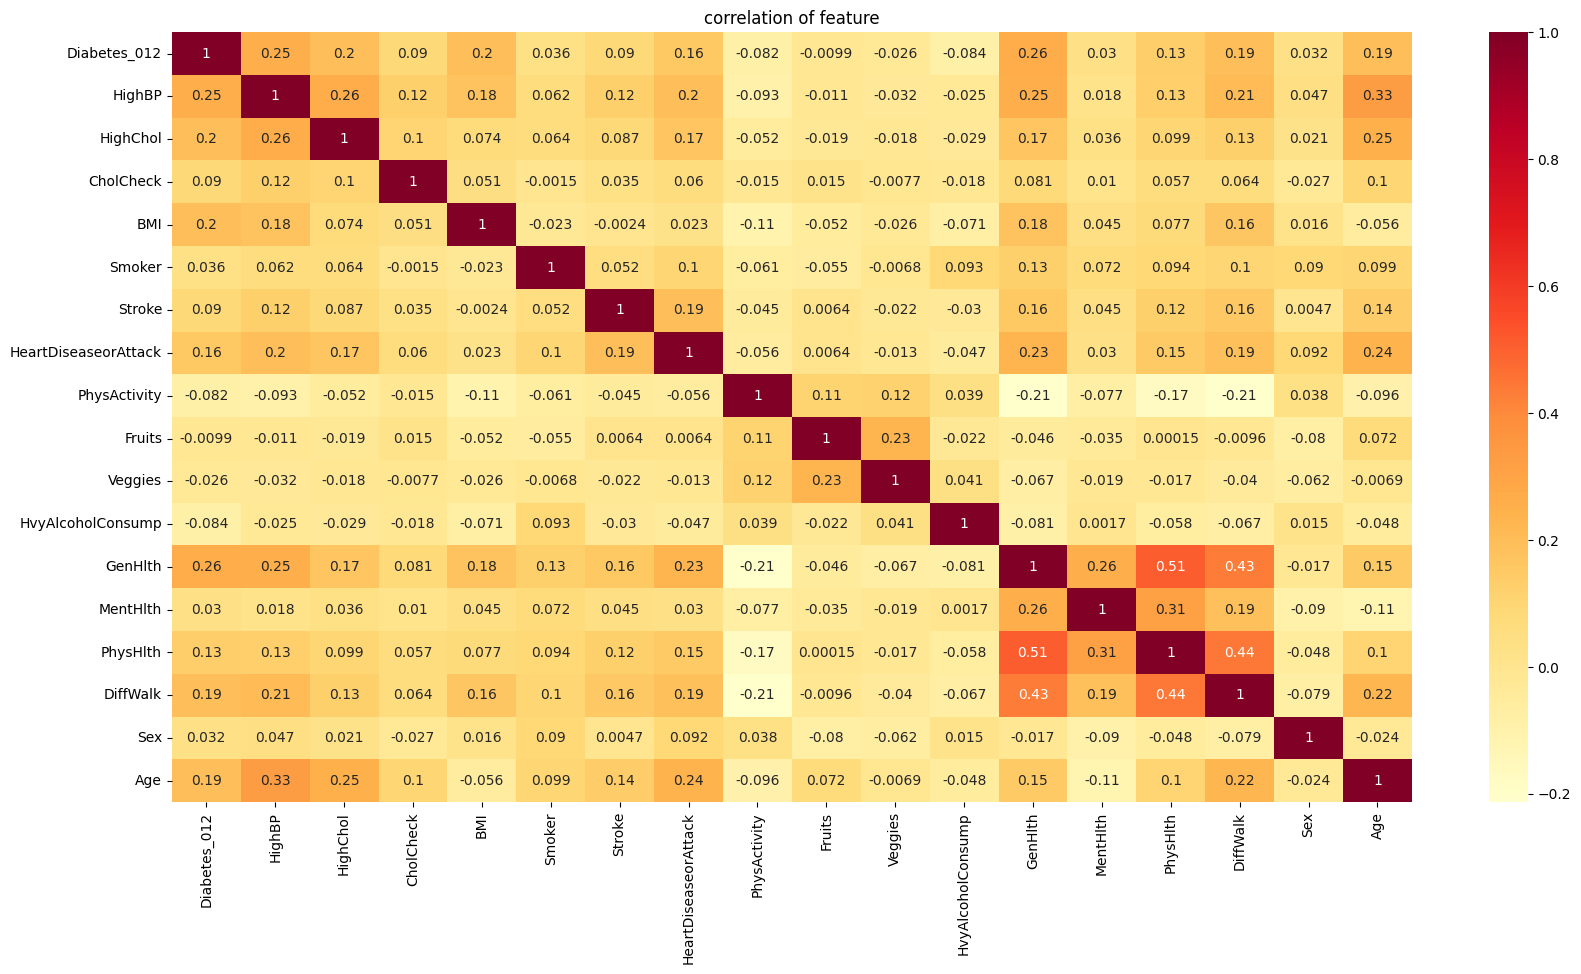

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")

In [ ]:
df['Diabetes_012'].value_counts()

Diabetes_012
0.0    151551
2.0     33398
1.0      4572
Name: count, dtype: int64

Karena datanya tidak seimbang, maka dilakukan concat pada data dengan data augmentation menggunakan library SMOTE

In [ ]:
x = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

In [ ]:
from imblearn.over_sampling import SMOTE
import scipy
import scipy.stats

smt = SMOTE(random_state=2)
x,y = smt.fit_resample(x,y)

In [ ]:
x.value_counts()
y.value_counts()

Diabetes_012
0.0    151551
2.0    151551
1.0    151551
Name: count, dtype: int64

Setelah data sudah setara, dilakukan pembuatan model dengan randomforest. Karena loistic regression hanya bisa memberikan jawaban biner, sedangkan jawaban yang dibutuhkan ada 3, yaitu non diabetes, predoabetes, dan diabetes

Dibuat data untuk melakukan training dan testing dengan test size 15% dan training 85%dengan longkap setiap 42 data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=30)

In [ ]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8912284817736591
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87     22870
         1.0       0.96      0.96      0.96     22872
         2.0       0.88      0.81      0.84     22456

    accuracy                           0.89     68198
   macro avg       0.89      0.89      0.89     68198
weighted avg       0.89      0.89      0.89     68198



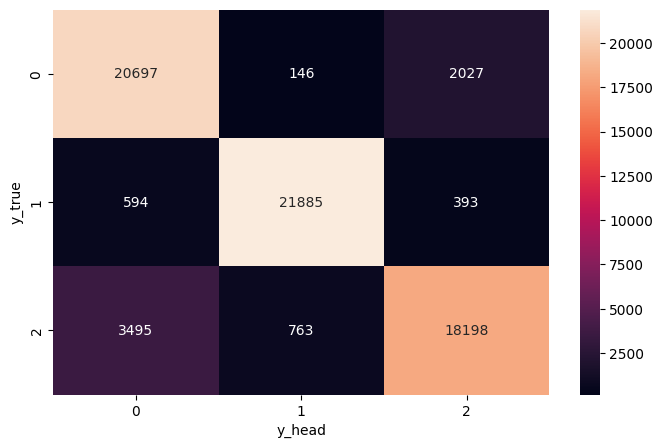

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [ ]:
joblib.dump(RFC, "Diabetes_model.sav")

['Diabetes_model.sav']